## Random Walk

In questo esercizio, creeremo un'animazione in cui una particella esegue un **random walk**.  
Ad ogni frame, la particella si sposta in una direzione casuale con un passo di lunghezza fissa.  
Il percorso della particella sarà tracciato sul canvas.

### Obiettivi:
- Simulare il movimento casuale della particella.
- Disegnare il percorso accumulato della particella sul canvas.
- Salvare le distanze dall'origine ad ogni passo in un file CSV.
- Analizzare i dati generati utilizzando matplotlib all'interno dello stesso notebook.


In [1]:
import sys

sys.path.append('../../risorse')

In [9]:
import time
import random
from ipycanvas import Canvas, hold_canvas
from animation import Animation

# Configurazione del canvas
WIDTH, HEIGHT = 400, 400
canvas = Canvas(width=WIDTH, height=HEIGHT)

# Colori
BACKGROUND_COLOR = "#496780"
PATH_COLOR = "#9e823f"
PARTICLE_COLOR = "#9e823f"

# Parametri della particella
x, y = WIDTH // 2, HEIGHT // 2  # Posizione iniziale
step_size = 5  # Lunghezza del passo
counter = 0  # Contatore dei passi

# Percorso della particella
path = [(x, y)]

# Funzione per disegnare il percorso della particella
def draw():
    with hold_canvas(canvas):
        # Pulisce il canvas
        canvas.clear()

        # Disegna il rettangolo
        canvas.fill_style = BACKGROUND_COLOR
        canvas.fill_rect(0, 0, WIDTH, HEIGHT)

        # Disegna il percorso
        canvas.stroke_style = PATH_COLOR
        canvas.line_width = 2
        canvas.begin_path()
        canvas.move_to(path[0][0], path[0][1])
        for i in range(counter - 1):
            canvas.line_to(path[i][0], path[i][1])
        canvas.stroke()

        # Disegna la particella
        canvas.fill_style = PARTICLE_COLOR
        canvas.fill_circle(x, y, 10)

# Funzione per aggiornare la posizione della particella
def evolve():
    global x, y, counter

    # Movimento casuale
    direction = random.choice(["up", "down", "left", "right"])
    if direction == "up":
        y -= step_size
    elif direction == "down":
        y += step_size
    elif direction == "left":
        x -= step_size
    elif direction == "right":
        x += step_size

    # Aggiorna il percorso
    path.append((x, y))

    # Incrementa il contatore dei passi
    counter += 1

# Funzione di aggiornamento per l'animazione
def update():
    draw()
    evolve()
    time.sleep(1 / 60)

# Avvio dell'animazione
anim = Animation(canvas, update)
anim.start()
anim.display()


## Analisi del Random Walk

Nella seconda parte dell'esercizio, analizzeremo i dati raccolti durante l'animazione del random walk.  

### Obiettivi:
1. Calcolare la distanza di ogni punto registrato dall'origine del canvas.
2. Visualizzare l'andamento della distanza nel tempo utilizzando un grafico creato con **matplotlib**.

Questa analisi ci permetterà di osservare come la particella si allontana casualmente dall'origine e di verificare il comportamento del random walk.


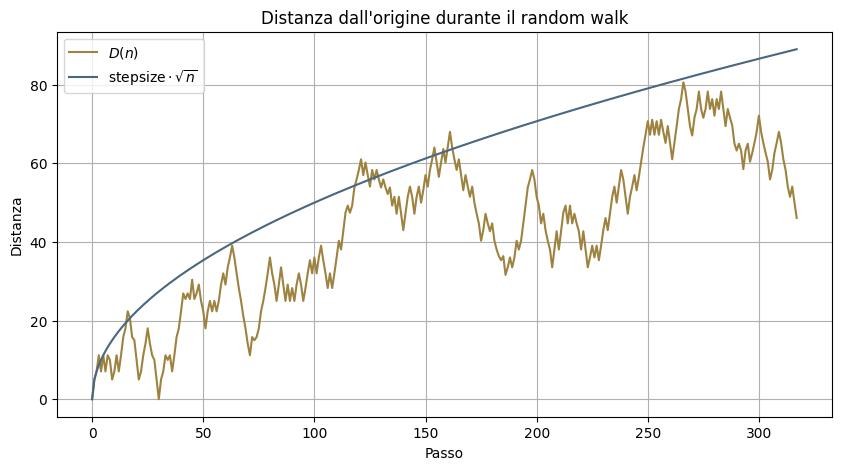

In [22]:
import numpy as np
from matplotlib import pyplot as plt

xs = np.array([pt[0] for pt in path])
ys = np.array([pt[1] for pt in path])
x0 = xs[0]
y0 = ys[0]

# Calcola la distanza dall'origine
ds = np.sqrt((xs - x0)**2 + (ys - y0)**2)

# Calcola il numero di passi
steps = len(ds)

# Disegna la distanza dall'origine
plt.figure(figsize=(10, 5))
plt.plot(ds, label="$D(n)$", color=PARTICLE_COLOR)
plt.plot(step_size * np.sqrt(range(steps)), label="$\\text{stepsize}\\cdot\\sqrt{n}$", color=BACKGROUND_COLOR)
plt.title("Distanza dall'origine durante il random walk")
plt.xlabel("Passo")
plt.ylabel("Distanza")
plt.legend()
plt.grid()
plt.show()